<a href="https://colab.research.google.com/github/Raeiss/DL-Challenge-4/blob/main/DL_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install sklearn



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Raeiss/DL-Challenge-4/main/train.csv")

# summarise the details

df.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns = ['Id', 'Preg', 'Glu', 'BP', 'ST', 'Ins', 'BMI', 'DPF', 'Age', 'Output']

In [4]:
df.columns

Index(['Id', 'Preg', 'Glu', 'BP', 'ST', 'Ins', 'BMI', 'DPF', 'Age', 'Output'], dtype='object')

In [5]:
df.describe()

,Id,Preg,Glu,BP,ST,Ins,BMI,DPF,Age,Output
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data = df.iloc[:,1:9]
outcome = df.iloc[:,9]
x,y = data,outcome


In [7]:
data

,Preg,Glu,BP,ST,Ins,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
663,9,145,80,46,130,37.9,0.637,40
664,6,115,60,39,0,33.7,0.245,40
665,1,112,80,45,132,34.8,0.217,24
666,4,145,82,18,0,32.5,0.235,70


In [8]:
outcome

0      1
1      0
2      1
3      0
4      1
      ..
663    1
664    1
665    0
666    1
667    1
Name: Output, Length: 668, dtype: int64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100, test_size=0.3)

In [10]:
#COUNTING THE POSITIVE AND NEGATIVE VALUES
print(y_test.value_counts())
#MEAN OF THE TESTING DISTRIBUTION
print(1- y_test.mean())

0    132
1     69
Name: Output, dtype: int64
0.6567164179104478


In [11]:
#PARAMETER EVALUATION WITH GSC VALIDATION
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.8411666666666666


In [12]:
#ADJUSTING DEVELOPMENT THRESHOLD
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=100)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.5, random_state=0)

In [26]:
#STORING THE PREDICTION
yprediction = gbi.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

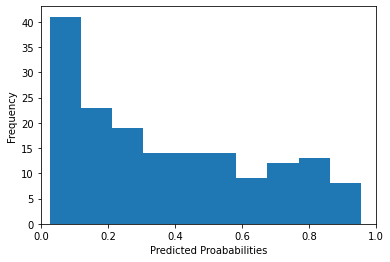

In [27]:
#PLOTTING THE PREDICTIONS
plt.hist(yprediction,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

In [28]:
yprediction

array([0.50380711, 0.06679221, 0.64406519, 0.37677792, 0.13388743,
       0.46759631, 0.09593537, 0.64992365, 0.39874745, 0.09677673,
       0.14138732, 0.72470184, 0.03473051, 0.87478294, 0.34506373,
       0.03199376, 0.55403613, 0.80218375, 0.40974608, 0.62965628,
       0.09122006, 0.21081699, 0.45583061, 0.15296425, 0.75548214,
       0.7806082 , 0.28084503, 0.05185854, 0.24144806, 0.43072051,
       0.8221097 , 0.81253262, 0.03570699, 0.03860999, 0.26330091,
       0.76569816, 0.0389409 , 0.75100757, 0.08902319, 0.26543199,
       0.92286355, 0.12838572, 0.16673815, 0.07247015, 0.2115862 ,
       0.47948741, 0.244506  , 0.74756033, 0.55893549, 0.80766766,
       0.2552121 , 0.347287  , 0.04253105, 0.34091621, 0.02765902,
       0.22534281, 0.08906361, 0.05692062, 0.11677412, 0.35481415,
       0.02626861, 0.76318675, 0.49312592, 0.82669414, 0.80196773,
       0.09779785, 0.05481898, 0.77833975, 0.25939662, 0.46431052,
       0.14158694, 0.71935823, 0.07768049, 0.03127559, 0.15530

In [29]:
#CLASSIFIER SCORE
round(roc_auc_score(y_test,yprediction),5)

0.83396

In [24]:
#USING RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
y_pred = rmfr.predict(x_test)
accuracyrf = round(accuracy_score(y_pred, y_test), 5)
accuracyrf

0.76048

In [25]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = round(accuracy_score(y_test, predictions),5)
accuracy

0.77246

In [32]:
test_df = pd.read_csv("https://raw.githubusercontent.com/Raeiss/DL-Challenge-4/main/test.csv")
test_df['Class'] = ""
test_df.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,98,58,33,190,34.0,0.430,43,
1,2,9,154,78,30,100,30.9,0.164,45,
2,3,6,165,68,26,168,33.6,0.631,49,
3,4,1,99,58,10,0,25.4,0.551,21,
4,5,10,68,106,23,49,35.5,0.285,47,


In [33]:
x_features = test_df.iloc[:,1:9]

In [34]:
x_features

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47
...,...,...,...,...,...,...,...,...
95,10,101,76,48,180,32.9,0.171,63
96,2,122,70,27,0,36.8,0.340,27
97,5,121,72,23,112,26.2,0.245,30
98,1,126,60,0,0,30.1,0.349,47


In [35]:
new_pred = gbi.predict(x_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- A1
- A2
- A3
- A4
- A5
- ...
Feature names seen at fit time, yet now missing:
- Age
- BMI
- BP
- DPF
- Glu
- ...

  warnings.warn(message, FutureWarning)


In [37]:
test_df['Class'] = new_pred

In [38]:
test_df.head()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,98,58,33,190,34.0,0.430,43,0
1,2,9,154,78,30,100,30.9,0.164,45,1
2,3,6,165,68,26,168,33.6,0.631,49,1
3,4,1,99,58,10,0,25.4,0.551,21,0
4,5,10,68,106,23,49,35.5,0.285,47,0


In [40]:
test_df.to_csv('new_predictons.csv', header=True, index=False)